In [1]:
import pickle

# Path to data
base_path = './Data/Neuchatel_316L'

# Path to the segmented data
pickle_file_path = base_path + '/segmented_data_dict_P.pkl'  

# Load the dictionary from the pickle file
with open(pickle_file_path, 'rb') as file:
    segmented_data_dict = pickle.load(file)

print('Loaded segmented_data_dict from file.')


Loaded segmented_data_dict from file.


In [2]:
segmented_data_dict

{(105,
  300.0): array([[[ 1.538086e-01,  1.261902e-01,  1.448059e-01, ...,
          -6.256104e-03, -7.171631e-03, -7.019043e-03],
         [ 1.057434e-01,  1.902771e-01,  2.198792e-01, ...,
           1.197815e-01,  1.176453e-01,  1.194763e-01]],
 
        [[ 1.480103e-01,  1.831055e-01,  2.111816e-01, ...,
          -9.155273e-04, -1.220703e-03, -4.425049e-03],
         [ 3.077698e-01,  3.143311e-01,  3.332520e-01, ...,
           1.362610e-01,  1.335144e-01,  1.313782e-01]],
 
        [[ 1.078796e-01,  1.947021e-01,  2.621460e-01, ...,
          -1.068115e-03, -5.187988e-03, -2.288818e-03],
         [ 1.312256e-01,  2.351379e-01,  2.976990e-01, ...,
           1.319885e-01,  1.243591e-01,  1.202393e-01]],
 
        ...,
 
        [[ 1.084900e-01,  2.503967e-01,  2.133179e-01, ...,
           3.814697e-03,  3.204346e-03,  0.000000e+00],
         [ 1.057434e-01,  1.617432e-01,  1.860046e-01, ...,
           1.150513e-01,  1.115417e-01,  1.098633e-01]],
 
        [[ 2.767944e-01,  2.3

In [3]:
def print_segmented_data_summary(segmented_data_dict):
    print("Summary of Segmented Data:")
    for key, tensor in segmented_data_dict.items():
        power, speed = key
        print(f"Power: {power}W, Speed: {speed}mm/s - Tensor Size: {tensor.shape}")

# Call the summary function
print_segmented_data_summary(segmented_data_dict)


Summary of Segmented Data:
Power: 105W, Speed: 300.0mm/s - Tensor Size: (10, 2, 6674)
Power: 105W, Speed: 1642.105263157895mm/s - Tensor Size: (10, 2, 1215)
Power: 105W, Speed: 1484.210526315789mm/s - Tensor Size: (10, 2, 1344)
Power: 105W, Speed: 378.9473684210526mm/s - Tensor Size: (10, 2, 5284)
Power: 105W, Speed: 931.578947368421mm/s - Tensor Size: (10, 2, 2143)
Power: 105W, Speed: 694.7368421052631mm/s - Tensor Size: (10, 2, 2876)
Power: 105W, Speed: 1168.421052631579mm/s - Tensor Size: (10, 2, 1711)
Power: 105W, Speed: 536.8421052631579mm/s - Tensor Size: (10, 2, 3727)
Power: 105W, Speed: 1721.052631578947mm/s - Tensor Size: (10, 2, 1161)
Power: 105W, Speed: 1563.157894736842mm/s - Tensor Size: (10, 2, 1278)
Power: 105W, Speed: 1326.315789473684mm/s - Tensor Size: (11, 2, 979)
Power: 105W, Speed: 457.8947368421053mm/s - Tensor Size: (11, 2, 4369)
Power: 105W, Speed: 1010.526315789474mm/s - Tensor Size: (10, 2, 1977)
Power: 105W, Speed: 1800.0mm/s - Tensor Size: (11, 2, 730)
Power

In [4]:
import numpy as np

# New dictionary to hold the reduced tensors
reduced_data_dict = {}


for key, tensor in segmented_data_dict.items():
    # Step 1: Reduce the tensor to (1, 2, M) using the median across the first axis
    median_tensor = np.median(tensor[:, :, int(tensor.shape[-1] * 0.1):int(tensor.shape[-1] * 0.9)], axis=0, keepdims=True)
    
    # Step 2: Calculate the median and std along the last axis for the reduced tensor
    median_of_median = np.median(median_tensor, axis=-1, keepdims=True)
    std_dev = np.std(median_tensor, axis=-1, keepdims=True)
    
    # Calculate the correlation coefficient between the two channels
    corr = np.corrcoef(median_tensor[0, 0, :], median_tensor[0, 1, :])[0, 1]

    # Instead of concatenating corr directly, create a structured representation
    combined_data = {
        'stats_tensor': np.concatenate((median_of_median, std_dev), axis=-1),  # Shape: (1, 2, 2)
        'corr': corr  # Scalar value
    }
    
    # Store this structured representation in the new dictionary
    reduced_data_dict[key] = combined_data

In [5]:
def print_reduced_data_summary(segmented_data_dict):
    print("Summary of Segmented Data:")
    for key, value in segmented_data_dict.items():
        power, speed = key
        print(f"Power: {power}W, Speed: {speed}mm/s - Tensor Size: {value['stats_tensor'].shape}")
        
print_reduced_data_summary(reduced_data_dict)


Summary of Segmented Data:
Power: 105W, Speed: 300.0mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 1642.105263157895mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 1484.210526315789mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 378.9473684210526mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 931.578947368421mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 694.7368421052631mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 1168.421052631579mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 536.8421052631579mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 1721.052631578947mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 1563.157894736842mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 1326.315789473684mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 457.8947368421053mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 1010.526315789474mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 1800.0mm/s - Tensor Size: (1, 2, 2)
Power: 105W, Speed: 615.7894736842105mm/s - Tensor Size: (1

In [6]:
import matplotlib.pyplot as plt

def plot_power_speed_data_with_corr(combined_data_dict):
    # Extract unique power values
    unique_powers = sorted(set(power for (power, _) in combined_data_dict.keys()))
    
    # For each unique power, find all speeds and process data
    for power in unique_powers:
        # Filter keys by power and sort speeds
        speeds = sorted(speed for (p, speed) in combined_data_dict.keys() if p == power)
        
        # Data for plotting
        medians_channel_0 = []
        medians_channel_1 = []
        stds_channel_0 = []
        stds_channel_1 = []
        corrs = []  # List to store correlation coefficients for each speed
        
        for speed in speeds:
            data_struct = combined_data_dict[(power, speed)]
            stats_tensor = data_struct['stats_tensor']  # Extract the stats tensor
            corr = data_struct['corr']  # Extract the correlation coefficient
            
            # Extract medians and standard deviations from the stats tensor
            medians_channel_0.append(stats_tensor[0, 0, 0])
            stds_channel_0.append(stats_tensor[0, 0, 1])
            medians_channel_1.append(stats_tensor[0, 1, 0])
            stds_channel_1.append(stats_tensor[0, 1, 1])
            corrs.append(corr)  # Store the correlation coefficient
        
        # Plotting the median and standard deviation for each channel
        fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
        fig.suptitle(f'Optical Data for Power = {power}W')
        
        axs[0].errorbar(speeds, medians_channel_0, yerr=stds_channel_0, fmt='-o', label='Channel 0: Emission')
        axs[1].errorbar(speeds, medians_channel_1, yerr=stds_channel_1, fmt='-o', color='r', label='Channel 1: Reflection')
        axs[2].plot(speeds, corrs, '-o', color='g', label='Correlation Coefficient')
        
        axs[0].set_xlabel('Speed (mm/s)')
        axs[0].set_ylabel('Median with STD')
        axs[0].legend()
        axs[1].set_xlabel('Speed (mm/s)')
        axs[1].legend()
        axs[2].set_xlabel('Speed (mm/s)')
        axs[2].set_ylabel('Correlation Coefficient')
        axs[2].legend()

        plt.show()

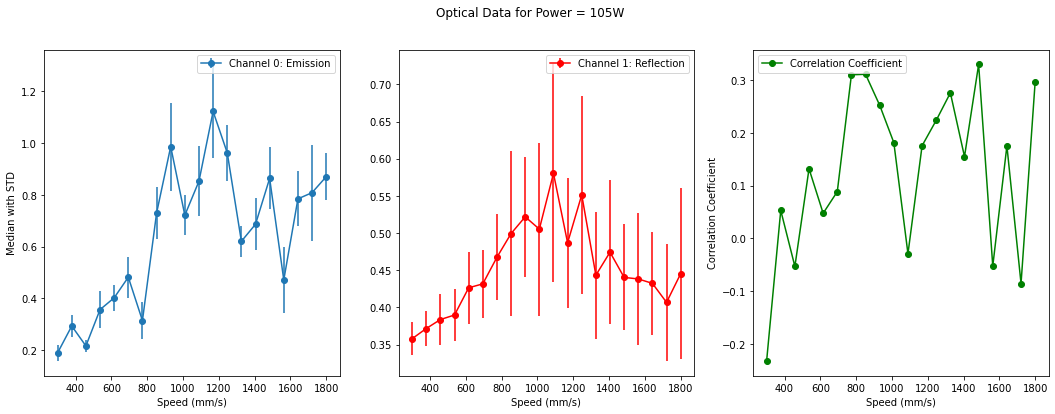

In [7]:
plot_power_speed_data_with_corr(reduced_data_dict)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_power_speed_data_with_lowest_corr(combined_data_dict):
    # Extract unique power values
    unique_powers = sorted(set(power for (power, _) in combined_data_dict.keys()))
    
    # For each unique power, find all speeds and process data
    for power in unique_powers:
        # Filter keys by power and sort speeds
        speeds = sorted(speed for (p, speed) in combined_data_dict.keys() if p == power)
        
        # Data for plotting
        medians_channel_0 = []
        medians_channel_1 = []
        stds_channel_0 = []
        stds_channel_1 = []
        corrs = []  # Store correlation coefficients

        for speed in speeds:
            data_struct = combined_data_dict[(power, speed)]
            stats_tensor = data_struct['stats_tensor']
            corr = data_struct['corr']
            
            medians_channel_0.append(stats_tensor[0, 0, 0])
            stds_channel_0.append(stats_tensor[0, 0, 1])
            medians_channel_1.append(stats_tensor[0, 1, 0])
            stds_channel_1.append(stats_tensor[0, 1, 1])
            corrs.append(corr)  # Append the correlation coefficient

        # Plotting with two y-axes
        fig, ax1 = plt.subplots(figsize=(12, 6))
        fig.suptitle(f'Optical Data for Power = {power}W')

        color1 = 'tab:blue'
        ax1.set_xlabel('Speed (mm/s)')
        ax1.set_ylabel('Channel 0: Emission', color=color1)
        ax1.errorbar(speeds, medians_channel_0, yerr=stds_channel_0, fmt='-o', color=color1, label='Channel 0: Emission')
        ax1.tick_params(axis='y', labelcolor=color1)

        # Instantiate a second y-axis
        ax2 = ax1.twinx()
        color2 = 'tab:red'
        ax2.set_ylabel('Channel 1: Reflection', color=color2)
        ax2.errorbar(speeds, medians_channel_1, yerr=stds_channel_1, fmt='-o', color=color2, label='Channel 1: Reflection')
        ax2.tick_params(axis='y', labelcolor=color2)

        # Ensure that the labels are correctly applied
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')

        # Find speed with the lowest correlation coefficient and add a vertical line
        min_corr_index = np.argmin(corrs)  # Index of the lowest correlation
        min_corr_speed = speeds[min_corr_index]  # Speed corresponding to the lowest correlation
        # Adding a label for the vertical line to be included in the legend
        ax1.axvline(x=min_corr_speed, color='k', linestyle='--', label='Lowest Corr Speed')

        # Calling legend after all labeled plot elements have been added
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')
        fig.tight_layout()  # For layout adjustment

        plt.show()

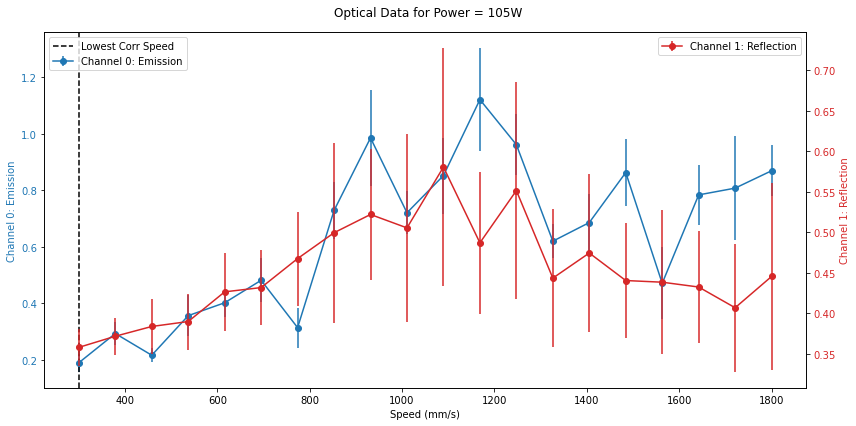

In [9]:
plot_power_speed_data_with_lowest_corr(reduced_data_dict)